In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import shutil
import pandas as pd
from pathlib import Path
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import (
    find_outliers, convert_age_from_days_to_years, draw_age_distribution, calculate_code_age_distribution)

In [2]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [3]:
DATASET_NAME = 'depthmap-190K-test'


In [4]:
from azureml.core import Workspace, Dataset

subscription_id = ''
resource_group = ''
workspace_name = ''

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='depthmap-190K-test')

In [5]:
dataset

Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'


{
  "source": [
    "('cgmmlciproddsetds', 'dataset-depthmap-Test-2023-06-20-21-17-58/**')"
  ],
  "definition": [
    "GetDatastoreFiles"
  ],
  "registration": {
    "id": "bcb10fe6-0e96-48eb-9aff-4e3897349270",
    "name": "depthmap-190K-test",
    "version": 1,
    "workspace": "Workspace.create(name='cgm-ml-prod-ci-azml', subscription_id='9b5bbfae-d5d1-4aae-a2ca-75159c0c887d', resource_group='cgm-ml-prod-ci-rg')"
  }
}

In [6]:
from azureml.core import Workspace, Dataset

# Connect to Workspace and reference Dataset
ws = Workspace.from_config()
dataset = ws.datasets[DATASET_NAME]

# Create mountcontext and mount the dataset
mount_ctx = dataset.mount()  
mount_ctx.start()  

Message: Running rslex direct volume mount: RSLEX_DIRECT_VOLUME_MOUNT=None, RSLEX_DIRECT_VOLUME_WRITABLE_MOUNT=None, enable_rslex_mount=None
Payload: {"pid": 950422, "version": "4.9.5"}
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'


In [7]:
# Get the mount point
dataset_mount_folder = mount_ctx.mount_point
print(dataset_mount_folder)

# List the files in the mount point
files = os.listdir(dataset_mount_folder)
print(files)

/tmp/tmpb8rzdo3p
['labels.csv', 'scans']


In [8]:
df = pd.read_csv(os.path.join(dataset_mount_folder, 'labels.csv'))

In [9]:
df.shape

(191789, 26)

In [10]:
# total number of folders/children
scans_path = os.path.join(dataset_mount_folder, 'scans')
print(scans_path)
scans_f = os.listdir(scans_path)
len(scans_f)

/tmp/tmpb8rzdo3p/scans


4103

In [12]:
df.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,artifact,artifact_id,device_model,person_id,age,sex,zscore_wfh,diagnosis_wfh,zscore_lhfa,diagnosis_lhfa,no_of_person,pose_score,pose_result,ord,format_temp,new_file_path
0,1678302450534/97c0ec99-9215-41f2-9505-4d588a8b...,2023-03-08-19-07-30-587402,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,1,depth,796e0540-bde4-11ed-8a41-872d073e7c28,986c9741-bde4-11ed-8a41-3f9a25eba39c,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.785075,"{'bbox_coordinates': [(392.55573, 265.76773), ...",1,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...
1,1678302450741/ae371d42-a801-4e66-b1a4-6518dec4...,2023-03-08-19-07-30-743654,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,2,depth,7987f5e0-bde4-11ed-8a41-7ff6b558dac2,986c9742-bde4-11ed-8a41-1766f3b65f09,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.802452,"{'bbox_coordinates': [(407.20746, 197.38132), ...",2,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...
2,1678302450869/aa3f94a6-ddf2-4156-8cb1-8b885da1...,2023-03-08-19-07-30-884277,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,3,depth,799bcc00-bde4-11ed-8a41-c7f539be7c7e,986fa480-bde4-11ed-8a41-0380d639a4ac,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.862610,"{'bbox_coordinates': [(422.52188, 211.5413), (...",3,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...
3,1678302450975/77d10546-01f4-4a44-aa4c-8326d446...,2023-03-08-19-07-30-978051,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,4,depth,79a987a0-bde4-11ed-8a41-672f32b3e4b1,986fa481-bde4-11ed-8a41-33520e5ae941,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.836100,"{'bbox_coordinates': [(380.5455, 162.7933), (7...",4,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...
4,1678302451066/fc86378e-80c8-49eb-8333-36082289...,2023-03-08-19-07-31-071820,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,5,depth,79b8c9e0-bde4-11ed-8a41-67c2a5f68b3b,986fa482-bde4-11ed-8a41-6fd010a33653,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.792965,"{'bbox_coordinates': [(394.79855, 239.26244), ...",5,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...


In [13]:
# df.rename(columns={'age_rgb': 'age'}, inplace=True)
df['Years'] = df.apply(convert_age_from_days_to_years, axis=1)
df.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,artifact,artifact_id,device_model,person_id,age,sex,zscore_wfh,diagnosis_wfh,zscore_lhfa,diagnosis_lhfa,no_of_person,pose_score,pose_result,ord,format_temp,new_file_path,Years
0,1678302450534/97c0ec99-9215-41f2-9505-4d588a8b...,2023-03-08-19-07-30-587402,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,1,depth,796e0540-bde4-11ed-8a41-872d073e7c28,986c9741-bde4-11ed-8a41-3f9a25eba39c,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.785075,"{'bbox_coordinates': [(392.55573, 265.76773), ...",1,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...,2
1,1678302450741/ae371d42-a801-4e66-b1a4-6518dec4...,2023-03-08-19-07-30-743654,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,2,depth,7987f5e0-bde4-11ed-8a41-7ff6b558dac2,986c9742-bde4-11ed-8a41-1766f3b65f09,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.802452,"{'bbox_coordinates': [(407.20746, 197.38132), ...",2,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...,2
2,1678302450869/aa3f94a6-ddf2-4156-8cb1-8b885da1...,2023-03-08-19-07-30-884277,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,3,depth,799bcc00-bde4-11ed-8a41-c7f539be7c7e,986fa480-bde4-11ed-8a41-0380d639a4ac,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.862610,"{'bbox_coordinates': [(422.52188, 211.5413), (...",3,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...,2
3,1678302450975/77d10546-01f4-4a44-aa4c-8326d446...,2023-03-08-19-07-30-978051,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,4,depth,79a987a0-bde4-11ed-8a41-672f32b3e4b1,986fa481-bde4-11ed-8a41-33520e5ae941,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.836100,"{'bbox_coordinates': [(380.5455, 162.7933), (7...",4,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...,2
4,1678302451066/fc86378e-80c8-49eb-8333-36082289...,2023-03-08-19-07-31-071820,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.1,14.4,5,depth,79b8c9e0-bde4-11ed-8a41-67c2a5f68b3b,986fa482-bde4-11ed-8a41-6fd010a33653,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.792965,"{'bbox_coordinates': [(394.79855, 239.26244), ...",5,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...,2


In [14]:
# Total number of artifacts
print(f"Total Number of artifacts: {len(df['artifact_id'])}")
print(f"Total Number of scans: {len(df.groupby('scan_id'))}")

Total Number of artifacts: 191789
Total Number of scans: 13284


In [15]:
# sample rgbds_file_path
sample_file = df['new_file_path'][0]
print(sample_file)

/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/101/pc_986c9740-bde4-11ed-8a41-a7f3907ad526_2023-03-08-19-07-30-587402_101_1.p


## Sample file

In [18]:
# sample scan
sample_scan = scans_f[0]
print(f'sample_scan: {sample_scan}')

print(os.listdir(scans_path + '/' + sample_scan))
f = scans_path + '/' + sample_scan + '/' + '202'
print(f"sample filepath: {f}")
print(os.listdir(f))

f_path = f + '/' + os.listdir(f)[0]
print(f_path)


sample_scan: 00259460-be74-11ed-8a41-273dd1f8751f
['200', '201', '202']
sample filepath: /tmp/tmpb8rzdo3p/scans/00259460-be74-11ed-8a41-273dd1f8751f/202
['pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-591560_202_3.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-700936_202_4.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-794689_202_5.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-904037_202_6.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-48-404182_202_7.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-48-576047_202_8.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-48-716616_202_9.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-48-904160_202_1.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-49-044754_202_2.p']
/tmp/tmpb8rzdo3p/scans/00259460-be74-11ed-8a41-273dd1f8751f/202/pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-591560_202_3.p


In [19]:
depthmaps, target = pickle.load(open(f_path, "rb"))

In [21]:
depthmaps.shape

(240, 180, 1)

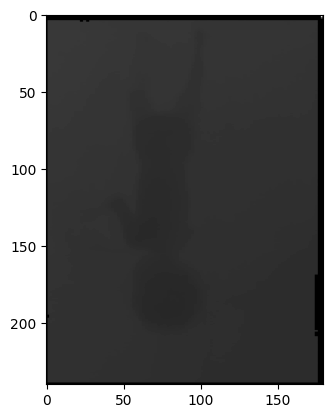

In [22]:
_ = plt.imshow(np.squeeze(depthmaps), cmap='gray')
plt.show()

In [23]:
target

{'file_path': '1678364083585/df864a79-30fe-4015-8571-eceae740e637',
 'timestamp': '2023-03-09-12-14-43-591560',
 'scan_id': '01edd140-be74-11ed-8a41-e7d2bdde4094',
 'scan_step': 202,
 'scan_version': 'v1.2.0',
 'height': 66.0,
 'weight': 5.25,
 'muac': 10.9,
 'order_number': 3,
 'format': 'depth',
 'artifact': 'f9910260-be73-11ed-8a41-5b17fbcc7508',
 'artifact_id': '01edd141-be74-11ed-8a41-3fbf80d9071a',
 'device_model': 'HUAWEI VOG-L29',
 'person_id': '00259460-be74-11ed-8a41-273dd1f8751f',
 'age': 630,
 'sex': 'female',
 'zscore_wfh': -3.78,
 'diagnosis_wfh': 'SAM',
 'zscore_lhfa': -5.7,
 'diagnosis_lhfa': 'Severely Stunted',
 'no_of_person': '1',
 'pose_score': '0.9121783',
 'pose_result': "{'bbox_coordinates': [(401.02188, 184.5189), (990.96344, 1404.7535)], 'bbox_confidence_score': [0.99714285], 'key_points_coordinate': [{'nose': {'x': 1030.6592, 'y': 739.686}}, {'left_eye': {'x': 1062.4362, 'y': 739.686}}, {'right_eye': {'x': 1062.4362, 'y': 739.686}}, {'left_ear': {'x': 1046.547

## Analysis

In [25]:
print("Total no. of artifacts:", len(df))
unique_scan_ids = df.drop_duplicates(subset='scan_id', keep='first')
print("Total no. of unique scan ids:", len(unique_scan_ids))
unique_person_ids = df.drop_duplicates(subset='person_id', keep='first')
print("Total no. of unique person ids:", len(unique_person_ids))

Total no. of artifacts: 191789
Total no. of unique scan ids: 13284
Total no. of unique person ids: 4103


device_model
HUAWEI VOG-L29    191789
Name: count, dtype: int64


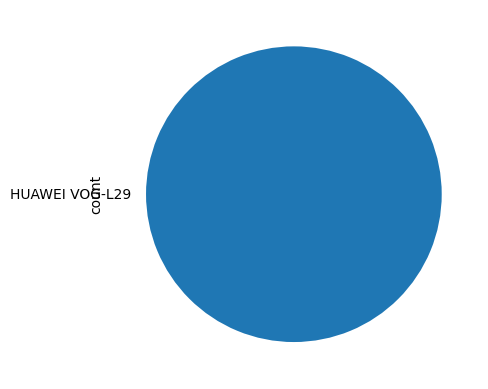

In [26]:
print(df['device_model'].value_counts())
_ = df['device_model'].value_counts().plot(kind='pie')

scan_version
v1.2.0    83464
v0.8      75470
v1.2.1    26920
v0.9       5935
Name: count, dtype: int64


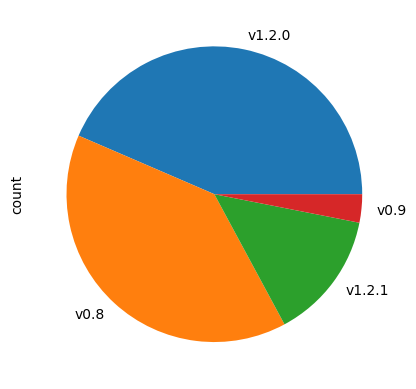

In [27]:
print(df['scan_version'].value_counts())
_ = df['scan_version'].value_counts().plot(kind='pie')

Years
0    444
1    960
2    882
3    889
4    921
5      7
Name: count, dtype: int64


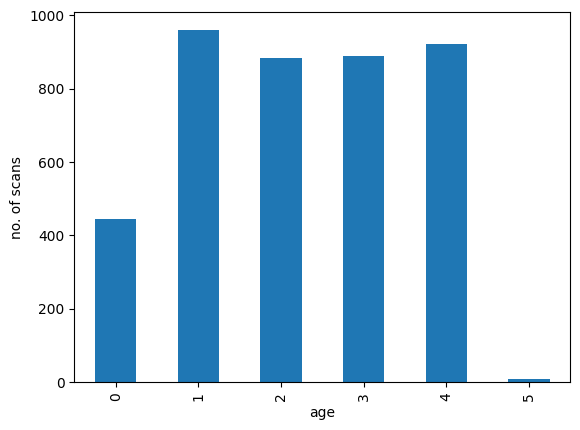

In [28]:
draw_age_distribution(unique_person_ids)

Years
0    1382
1    3128
2    2859
3    2893
4    3001
5      21
Name: count, dtype: int64


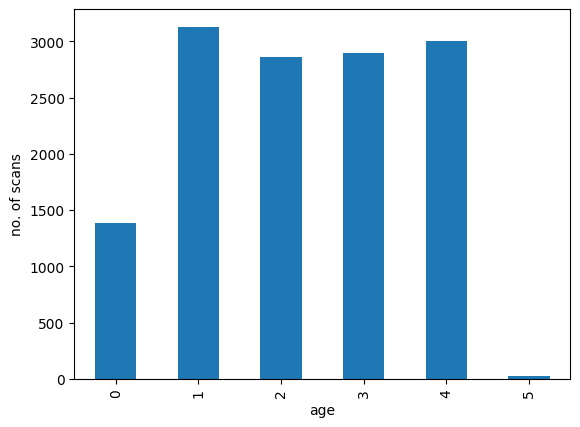

In [29]:
draw_age_distribution(unique_scan_ids)

scan_step
101    87178
100    31080
102    30625
201    24613
200     9362
202     8931
Name: count, dtype: int64


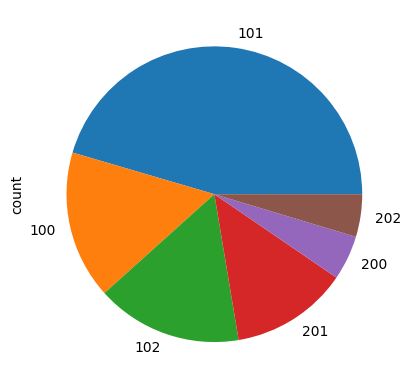

In [31]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(df['scan_step'].value_counts())
_ = df['scan_step'].value_counts().plot(kind='pie')

In [32]:
scan_type_colname = 'scan_step' # for other datasets this can be "key"
calculate_code_age_distribution(df, scan_type_colname)

2023-06-22 06:23:38,524 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/rbanka2/code/Users/rbanka/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
101,629,11961,23646,24571,26189
102,252,4245,8339,8679,9047
100,251,4511,8483,8692,9080
202,3807,4733,249,124,18
200,3917,5056,248,123,18
201,10378,13177,673,333,52


### Distribution of height, weight and age against each other

In [33]:
unique_scan_ids.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,artifact,artifact_id,device_model,person_id,age,sex,zscore_wfh,diagnosis_wfh,zscore_lhfa,diagnosis_lhfa,no_of_person,pose_score,pose_result,ord,format_temp,new_file_path,Years
0,1678302450534/97c0ec99-9215-41f2-9505-4d588a8b...,2023-03-08-19-07-30-587402,986c9740-bde4-11ed-8a41-a7f3907ad526,101,v1.2.0,86.0,11.10,14.4,1,depth,796e0540-bde4-11ed-8a41-872d073e7c28,986c9741-bde4-11ed-8a41-3f9a25eba39c,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.785075,"{'bbox_coordinates': [(392.55573, 265.76773), ...",1,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...,2
26,1678302477187/716155c6-1db2-4577-ad21-073d703d...,2023-03-08-19-07-57-197184,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.10,14.4,7,depth,894a6260-bde4-11ed-8a41-8b4b2db07fa3,9929ccc1-bde4-11ed-8a41-c72ffd5f6d10,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.868541,"{'bbox_coordinates': [(443.69577, 120.54117), ...",7,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...,2
35,1678302500766/d57a7e86-3619-4434-96a3-9feeb128...,2023-03-08-19-08-20-775802,99c26340-bde4-11ed-8a41-27adee4942f4,100,v1.2.0,86.0,11.10,14.4,1,depth,97586820-bde4-11ed-8a41-ef3eabfee745,99c26341-bde4-11ed-8a41-275ebc611be8,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,-0.54,Healthy,-0.79,Not Stunted,1,0.942719,"{'bbox_coordinates': [(371.8005, 78.51518), (7...",1,depth,/scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/10...,2
44,1678302451222/e481e681-a9dc-4501-86aa-c1a06ed9...,2023-03-08-19-07-31-228055,aab78361-bde4-11ed-8a41-9382d32711a5,100,v1.2.0,86.9,11.35,15.5,1,depth,79cfad40-bde4-11ed-8a41-17fe789699ea,aaba90a0-bde4-11ed-8a41-c712d18e14f5,HUAWEI VOG-L29,aab5fcc0-bde4-11ed-8a41-2bb725dac827,1088,male,-0.84,Healthy,-2.44,Moderately Stunted,1,0.947321,"{'bbox_coordinates': [(310.09265, 137.10991), ...",1,depth,/scans/aab5fcc0-bde4-11ed-8a41-2bb725dac827/10...,2
53,1678302477218/b84230b7-4c26-433c-91a7-c90b583c...,2023-03-08-19-07-57-228482,ab37afe0-bde4-11ed-8a41-6724d391b1be,102,v1.2.0,86.9,11.35,15.5,1,depth,894ef640-bde4-11ed-8a41-7f5910b68fe7,ab3abd20-bde4-11ed-8a41-13e52f784101,HUAWEI VOG-L29,aab5fcc0-bde4-11ed-8a41-2bb725dac827,1088,male,-0.84,Healthy,-2.44,Moderately Stunted,1,0.869604,"{'bbox_coordinates': [(381.59152, 122.04487), ...",1,depth,/scans/aab5fcc0-bde4-11ed-8a41-2bb725dac827/10...,2


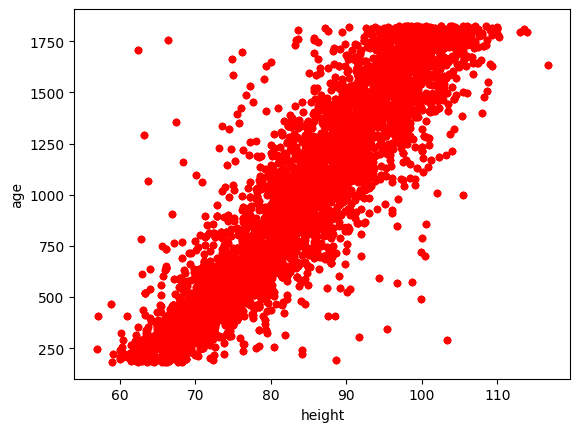

In [35]:
#distribution of height against age
height_vs_age = unique_scan_ids.plot.scatter(x='height', y='age', c='red')

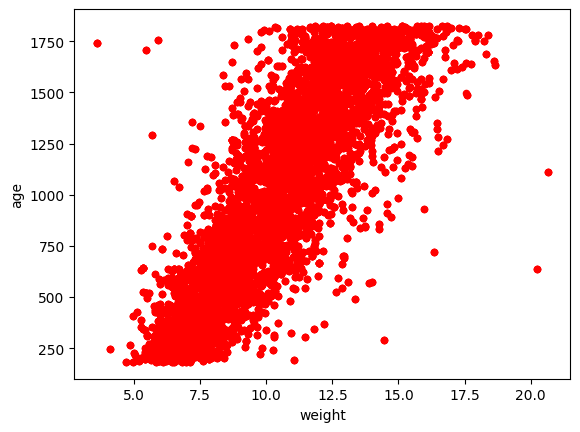

In [36]:
#distribution of weight against age
weight_vs_age = unique_scan_ids.plot.scatter(x='weight', y='age', c='red')

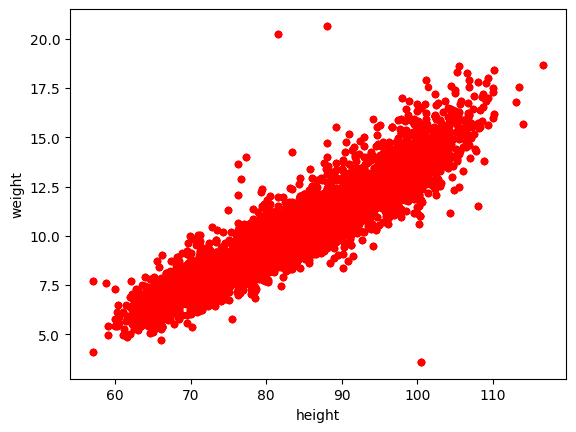

In [38]:
weight_vs_height = unique_scan_ids.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [39]:
df.describe()

,scan_step,height,weight,muac,order_number,age,zscore_wfh,zscore_lhfa,no_of_person,pose_score,ord,Years
count,191789.000000,191789.000000,191789.000000,191789.000000,191789.000000,191789.000000,191789.000000,191789.000000,191789.000000,191789.000000,191789.000000,191789.00000
mean,123.366841,84.704051,10.475809,13.703673,10.185115,1020.051353,-1.258060,-2.138254,1.077700,0.841033,10.185115,2.26124
std,41.675499,11.190905,2.521819,1.025163,7.936369,474.240762,1.080166,1.413143,0.329576,0.150591,7.936369,1.31261
min,100.000000,57.000000,3.600000,9.600000,1.000000,183.000000,-11.820000,-10.090000,1.000000,0.042543,1.000000,0.00000
25%,101.000000,75.800000,8.500000,13.000000,4.000000,607.000000,-1.930000,-2.900000,1.000000,0.816859,4.000000,1.00000
50%,101.000000,85.100000,10.450000,13.600000,8.000000,1023.000000,-1.250000,-2.160000,1.000000,0.884375,8.000000,2.00000
75%,102.000000,93.700000,12.250000,14.300000,16.000000,1433.000000,-0.610000,-1.380000,1.000000,0.934873,16.000000,3.00000
max,202.000000,116.700000,20.650000,18.200000,130.000000,1825.000000,8.290000,13.330000,9.000000,0.975601,130.000000,5.00000


In [40]:
unique_scan_ids.describe()

,scan_step,height,weight,muac,order_number,age,zscore_wfh,zscore_lhfa,no_of_person,pose_score,ord,Years
count,13284.000000,13284.000000,13284.000000,13284.000000,13284.000000,13284.000000,13284.000000,13284.000000,13284.000000,13284.000000,13284.000000,13284.000000
mean,124.302243,84.449782,10.424769,13.693360,2.620747,1009.184207,-1.255377,-2.142736,1.083634,0.843206,2.620747,2.230804
std,42.286169,11.227189,2.526140,1.026007,4.354080,475.647060,1.078117,1.414191,0.348590,0.155673,4.354080,1.316861
min,100.000000,57.000000,3.600000,9.600000,1.000000,183.000000,-11.820000,-10.090000,1.000000,0.069146,1.000000,0.000000
25%,100.000000,75.300000,8.400000,13.000000,1.000000,592.000000,-1.922500,-2.910000,1.000000,0.818495,1.000000,1.000000
50%,101.000000,84.700000,10.350000,13.600000,1.000000,1002.000000,-1.250000,-2.160000,1.000000,0.892081,1.000000,2.000000
75%,102.000000,93.500000,12.200000,14.300000,1.000000,1422.000000,-0.610000,-1.380000,1.000000,0.940638,1.000000,3.000000
max,202.000000,116.700000,20.650000,18.200000,40.000000,1825.000000,8.290000,13.330000,6.000000,0.973184,40.000000,5.000000


### 1) check age

In [41]:
find_outliers(df, 'age', '<365/2', data_id_name='person_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [42]:
find_outliers(df, 'age', '<365/2', data_id_name='scan_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [43]:
find_outliers(df, 'age', '>365*6', data_id_name='scan_id')

Running the following query: @df.age>365*6
No. of outliers: 0


[]

### 2) Check weight

In [44]:
find_outliers(df, 'weight', '<5.0', data_id_name='scan_id')

Running the following query: @df.weight<5.0
No. of outliers: 19


['b28888c0-beaf-11ed-8a41-d791b4da2641',
 'b34ee600-beaf-11ed-8a41-b7af8d0d0f19',
 'b4926280-beaf-11ed-8a41-23bd582bcf6c',
 '159167c1-bef1-11ed-8a41-57719449f600',
 '1657c500-bef1-11ed-8a41-1f14a7baf231',
 '17a77680-bef1-11ed-8a41-1f378819c0d0',
 '6c44c801-bf96-11ed-8a41-b75dbedb3f3d',
 '6d2fc440-bf96-11ed-8a41-d7b630b75b2a',
 '6e965920-bf96-11ed-8a41-9b62eac680fb',
 '7cbb1601-bfa8-11ed-8a41-6f0653822311',
 '7e294c00-bfa8-11ed-8a41-0bf3fedc5ba7',
 '7ed124c0-bfa8-11ed-8a41-3324246620b3',
 'b2a9fa20-bfc5-11ed-8a41-6375ff9e2bae',
 'b3441740-bfc5-11ed-8a41-433d9212256e',
 'b453b280-bfc5-11ed-8a41-afb3632b81b8',
 'f048c462-e3c7-11ed-b964-cfb324b9d1b4',
 'f0f47316-e3c7-11ed-baa4-6b7168eb8fab',
 'f1787c92-e3c7-11ed-bb8f-db9f8e09f342',
 'f1c3f8c0-e3c7-11ed-bc0a-538561852b58']

In [45]:
find_outliers(df, 'weight', '>30.0', data_id_name='scan_id')

Running the following query: @df.weight>30.0
No. of outliers: 0


[]

### 3) check height

In [46]:
find_outliers(df, 'height', '<40.0', data_id_name='scan_id')

Running the following query: @df.height<40.0
No. of outliers: 0


[]

In [47]:
find_outliers(df, 'height', '>150.0', data_id_name='scan_id')

Running the following query: @df.height>150.0
No. of outliers: 0


[]

In [48]:
# now close the mount context
mount_ctx.stop()